In [23]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

In [24]:
df_uk = df[df["job_country"] == "United Kingdom"].copy()

In [25]:
df_uk["job_posted_month"] = df_uk.job_posted_date.dt.strftime("%B")
df_uk_pivot = df_uk.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_uk_pivot.reset_index(inplace=True)


job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_no,,,,,,,,,,,
4,April,29,7,561,611,519,8,63,155,123,18
8,August,22,7,610,863,657,15,96,247,181,13
12,December,124,31,712,1034,752,78,110,213,194,97
2,February,23,4,1051,1009,859,10,140,301,212,10
1,January,46,3,1467,1253,1142,8,169,347,326,20
7,July,38,5,892,960,646,13,116,321,184,12
6,June,14,2,736,862,636,3,102,292,154,4
3,March,47,5,712,789,699,8,91,224,179,19
5,May,23,1,614,645,486,11,60,227,153,16


In [32]:
df_uk_pivot["month_no"] = pd.to_datetime(df_uk_pivot["job_posted_month"], format="%B").dt.month
df_uk_pivot.sort_values("month_no", ascending=True, inplace=True)
df_uk_pivot.set_index("job_posted_month", inplace=True)

In [35]:
df_uk_pivot.drop(columns = "month_no", inplace = True)

In [36]:
df_uk_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


In [51]:
df_top = df_uk.value_counts("job_title_short").head(3)
df_top = df_top.index.to_list()
df_top

['Data Engineer', 'Data Analyst', 'Data Scientist']

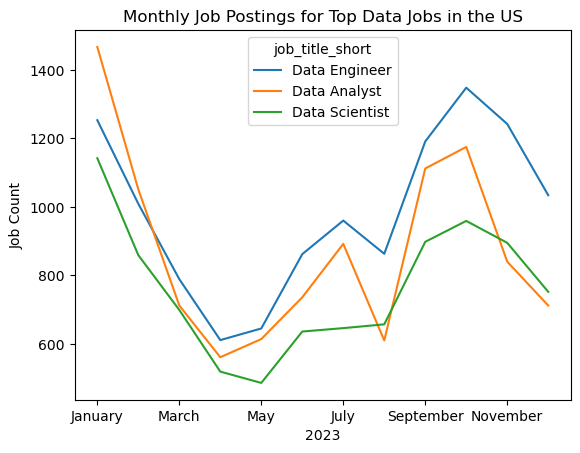

In [54]:
df_uk_pivot[df_top].plot(kind="line")
plt.title("Monthly Job Postings for Top Data Jobs in the US")
plt.ylabel("Job Count")
plt.xlabel("2023")
plt.show()